In [2]:
#Standard
import numpy as np
import pandas as pd
from numpy.random import randn
#Stats
from scipy import stats
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#for inline output in iPython Notebook:
%matplotlib inline

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
cc_df = pd.read_csv('Consumer_Complaints.csv')
cc_df = pd.DataFrame(cc_df)
cc_df.head()

/home/cassius/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,01/01/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"Lamont, Hanley & Associates, Inc.",PA,194XX,Web,01/01/2016,Closed with explanation,Yes,Yes,1723490
1,12/31/2015,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes it acted appropriately as aut...,"Lamont, Hanley & Associates, Inc.",MA,020XX,Web,12/31/2015,Closed with explanation,Yes,No,1724395
2,12/31/2015,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company can't verify or dispute the facts in t...,Focus Holding Company,AL,36477,Web,12/31/2015,Closed with explanation,Yes,No,1724294
3,12/31/2015,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,NaN,NaN,Navy FCU,GA,30045,Web,12/31/2015,In progress,Yes,No,1723811
4,12/31/2015,Debt collection,Auto,Disclosure verification of debt,Right to dispute notice not received,NaN,NaN,Caine & Weiner Co. Inc.,PA,191XX,Web,12/31/2015,Closed with explanation,Yes,No,1722410


In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501193 entries, 0 to 501192
Data columns (total 16 columns):
Date received                   501193 non-null object
Product                         501193 non-null object
Sub-product                     361520 non-null object
Issue                           501182 non-null object
Sub-issue                       186245 non-null object
Consumer complaint narrative    45191 non-null object
Company public response         57932 non-null object
Company                         501193 non-null object
State                           494489 non-null object
ZIP code                        496577 non-null object
Submitted via                   501193 non-null object
Date sent to company            501193 non-null object
Company response to consumer    501193 non-null object
Timely response?                501193 non-null object
Consumer disputed?              501193 non-null object
Complaint ID                    501193 non-null int64
dtypes: int6

In [5]:
cc_df['Product'].unique()

array(['Debt collection', 'Bank account or service', 'Credit reporting',
       'Consumer Loan', 'Money transfers', 'Mortgage', 'Credit card',
       'Payday loan', 'Student loan', 'Other financial service',
       'Prepaid card'], dtype=object)

In [6]:
## Grouping by product 
g = cc_df.groupby('Product')

In [7]:
## Looks like after mortgages, debt collection received the next largest amount of consumer complaints.
## Let's have a look. 
size = g.size()
most_comps = size[size > 10000]
most_comps

Product
Bank account or service     56930
Consumer Loan               18263
Credit card                 60580
Credit reporting            79093
Debt collection             89170
Mortgage                   173375
Student loan                14530
dtype: int64

In [8]:
cc_df = g.filter(lambda x: len(x) > 10000)
cc_df = cc_df.drop(['Sub-product','Company public response','Consumer complaint narrative',
                    'ZIP code','Submitted via','Complaint ID',],axis=1)
cc_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,01/01/2016,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,"Lamont, Hanley & Associates, Inc.",PA,01/01/2016,Closed with explanation,Yes,Yes
1,12/31/2015,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,"Lamont, Hanley & Associates, Inc.",MA,12/31/2015,Closed with explanation,Yes,No
2,12/31/2015,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,Focus Holding Company,AL,12/31/2015,Closed with explanation,Yes,No
3,12/31/2015,Bank account or service,"Account opening, closing, or management",NaN,Navy FCU,GA,12/31/2015,In progress,Yes,No
4,12/31/2015,Debt collection,Disclosure verification of debt,Right to dispute notice not received,Caine & Weiner Co. Inc.,PA,12/31/2015,Closed with explanation,Yes,No


In [9]:
cc_df.shape

(491941, 10)

In [10]:
type(cc_df)

pandas.core.frame.DataFrame

In [11]:
## Let's check out the DataFrame for debt collection complaints:
debt_df = cc_df[cc_df['Product'] == 'Debt collection']
debt_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,01/01/2016,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,"Lamont, Hanley & Associates, Inc.",PA,01/01/2016,Closed with explanation,Yes,Yes
1,12/31/2015,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,"Lamont, Hanley & Associates, Inc.",MA,12/31/2015,Closed with explanation,Yes,No
2,12/31/2015,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,Focus Holding Company,AL,12/31/2015,Closed with explanation,Yes,No
4,12/31/2015,Debt collection,Disclosure verification of debt,Right to dispute notice not received,Caine & Weiner Co. Inc.,PA,12/31/2015,Closed with explanation,Yes,No
5,12/31/2015,Debt collection,Communication tactics,Frequent or repeated calls,"Mariner Finance, LLC",NC,12/31/2015,Closed with explanation,Yes,No


In [20]:
## Looks like if we eliminate companies with less than 1000 complaints for debt collection,
## we can get a 'top 13' list. 
debt_df['Company'].value_counts()

Encore Capital Group                                          5444
Portfolio Recovery Associates, Inc.                           2816
Enhanced Recovery Company, LLC                                2375
Citibank                                                      1841
Expert Global Solutions, Inc.                                 1492
Synchrony Bank                                                1390
Capital One                                                   1368
Resurgent Capital Services L.P.                               1314
Convergent Resources, Inc.                                    1148
JPMorgan Chase                                                1126
Bank of America                                               1031
Allied Interstate LLC                                         1020
Navient                                                       1008
Transworld Systems Inc.                                        946
Diversified Consultants, Inc.                                 

In [24]:
c = debt_df.groupby('Company')
size = c.size()
most_comps = size[size > 1000]
most_comps

Company
Allied Interstate LLC                  1020
Bank of America                        1031
Capital One                            1368
Citibank                               1841
Convergent Resources, Inc.             1148
Encore Capital Group                   5444
Enhanced Recovery Company, LLC         2375
Expert Global Solutions, Inc.          1492
JPMorgan Chase                         1126
Navient                                1008
Portfolio Recovery Associates, Inc.    2816
Resurgent Capital Services L.P.        1314
Synchrony Bank                         1390
dtype: int64

In [26]:
## Now let's sort so we only keep the top 13 most-complained-about companies:
debt_df = c.filter(lambda x: len(x) > 1000)
debt_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
83,12/29/2015,Debt collection,Cont'd attempts collect debt not owed,Debt was paid,"Convergent Resources, Inc.",NE,12/29/2015,Closed with explanation,Yes,Yes
100,12/29/2015,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine,"Enhanced Recovery Company, LLC",TX,12/29/2015,Closed with non-monetary relief,Yes,No
122,12/29/2015,Debt collection,Communication tactics,Threatened to take legal action,"Convergent Resources, Inc.",KS,12/29/2015,Closed with explanation,Yes,Yes
144,12/28/2015,Debt collection,Disclosure verification of debt,Not given enough info to verify debt,"Expert Global Solutions, Inc.",VA,12/28/2015,In progress,Yes,No
148,12/28/2015,Debt collection,Communication tactics,Frequent or repeated calls,"Convergent Resources, Inc.",WI,12/30/2015,Closed with explanation,Yes,No


/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


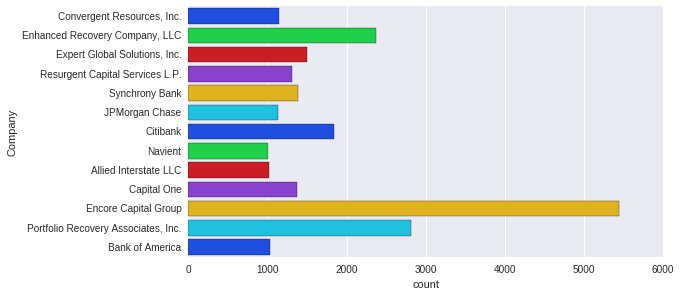

In [81]:
## So Encore Capital and Portfolio Recovery earned the top spots for debt collection
## complaints.

sns.factorplot(y="Company",data=debt_df,palette='bright',kind='count',size=4,aspect=2.4,)

In [42]:
## Let's check out the results for credit reporting complaints.
crep_df = cc_df[cc_df['Product'] == 'Credit reporting']
crep_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
6,12/31/2015,Credit reporting,Incorrect information on credit report,Personal information,"Credit Karma, Inc.",NY,12/31/2015,Closed with explanation,Yes,No
11,12/30/2015,Credit reporting,Unable to get credit report/credit score,Problem getting my free annual report,Equifax,UT,12/30/2015,Closed with explanation,Yes,No
33,12/30/2015,Credit reporting,Improper use of my credit report,Report improperly shared by CRC,Equifax,CA,12/30/2015,Closed with explanation,Yes,No
35,12/30/2015,Credit reporting,Unable to get credit report/credit score,Problem getting report or credit score,Equifax,TX,12/30/2015,Closed with explanation,Yes,No
36,12/30/2015,Credit reporting,Incorrect information on credit report,Public record,Equifax,SC,12/30/2015,Closed with explanation,Yes,No


In [43]:
## Of course there are really only 3 companies known for credit reporting in the USA. 
crep_df['Company'].value_counts()

Equifax                                                27148
Experian                                               26653
TransUnion                                             21948
FNIS (Fidelity National Information Services, Inc.)      566
Capital One                                              170
LexisNexis                                               157
Citibank                                                 130
CoreLogic                                                129
First Advantage Corporation                              110
Innovis                                                  104
Wells Fargo                                               86
Credit Karma, Inc.                                        77
Encore Capital Group                                      70
Synchrony Bank                                            64
JPMorgan Chase                                            62
First Data Corporation                                    62
Early Warning Services, 

In [45]:
r = crep_df.groupby('Company')
size = r.size()
most_comps = size[size > 600]
most_comps

Company
Equifax       27148
Experian      26653
TransUnion    21948
dtype: int64

In [52]:
crep_df = r.filter(lambda x: len(x) > 1000)
crep_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
11,12/30/2015,Credit reporting,Unable to get credit report/credit score,Problem getting my free annual report,Equifax,UT,12/30/2015,Closed with explanation,Yes,No
33,12/30/2015,Credit reporting,Improper use of my credit report,Report improperly shared by CRC,Equifax,CA,12/30/2015,Closed with explanation,Yes,No
35,12/30/2015,Credit reporting,Unable to get credit report/credit score,Problem getting report or credit score,Equifax,TX,12/30/2015,Closed with explanation,Yes,No
36,12/30/2015,Credit reporting,Incorrect information on credit report,Public record,Equifax,SC,12/30/2015,Closed with explanation,Yes,No
37,12/30/2015,Credit reporting,Incorrect information on credit report,Personal information,Equifax,IN,12/30/2015,Closed with explanation,Yes,No


/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


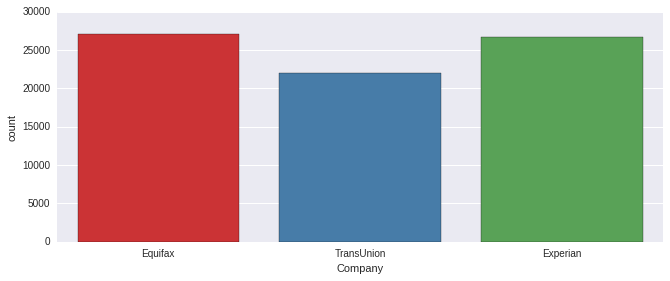

In [80]:
## We can see the big 3 are really competing - come on TransUnion, you're just 
## not trying!
sns.factorplot(x='Company',data=crep_df,kind='count', palette='Set1',size=4,aspect=2.3)

In [59]:
## Who's rockin' the student loan crowd? 
stdnt_df = cc_df[cc_df['Product'] == 'Student loan']
stdnt_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
235,12/26/2015,Student loan,Dealing with my lender or servicer,Keep getting calls about my loan,KeyBank NA,NY,12/26/2015,Closed with explanation,Yes,No
283,12/24/2015,Student loan,Can't repay my loan,Can't get flexible payment options,Wells Fargo,MT,12/24/2015,Closed with monetary relief,Yes,No
497,12/22/2015,Student loan,Can't repay my loan,Can't get flexible payment options,JPMorgan Chase,NM,12/22/2015,Closed with explanation,Yes,No
528,12/22/2015,Student loan,Dealing with my lender or servicer,Trouble with how payments are handled,Vermont Student Assistance Corporation,NH,12/22/2015,Closed with explanation,Yes,No
548,12/22/2015,Student loan,Dealing with my lender or servicer,Trouble with how payments are handled,Wells Fargo,TX,12/22/2015,Closed with explanation,Yes,No


In [62]:
stdnt_df['Company'].value_counts().head(10)

Navient                   6096
AES/PHEAA                 1474
Wells Fargo                913
Sallie Mae                 716
JPMorgan Chase             678
Discover                   553
Citibank                   490
Genesis Lending            421
ACS Education Services     393
KeyBank NA                 347
Name: Company, dtype: int64

In [65]:
## With all the press dedicated to it, it's kind of hard to believe there 
## aren't more complaints in general with respect to student loans. 
s = stdnt_df.groupby('Company')
size = s.size()
most_comps = size[size > 300]
most_comps

Company
ACS Education Services     393
AES/PHEAA                 1474
Citibank                   490
Discover                   553
Genesis Lending            421
JPMorgan Chase             678
KeyBank NA                 347
Navient                   6096
Sallie Mae                 716
Wells Fargo                913
dtype: int64

In [69]:
stdnt_df = s.filter(lambda x: len(x) > 300)

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


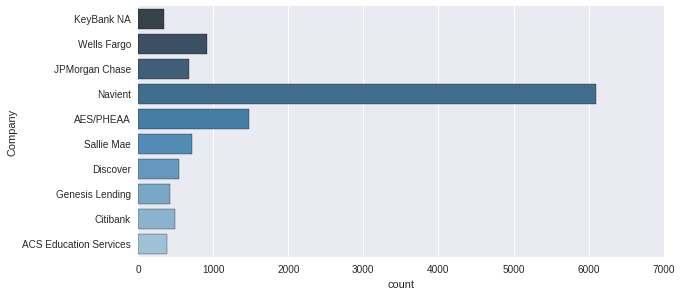

In [77]:
## Looks like Navient takes pretty much the entire cake
## in the student loan complaint department.
sns.factorplot(y='Company',data=stdnt_df,kind='count',palette='Blues_d',size=4,aspect=2.4)